In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [4]:
df0 = df[df.Outcome == 0]
df1 = df[df.Outcome == 1]

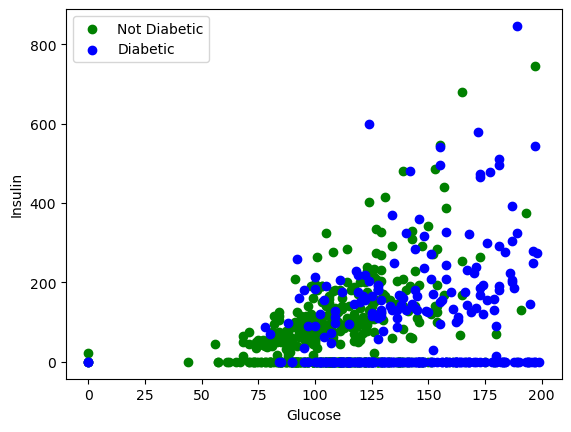

In [5]:
plt.scatter(df0['Glucose'], df0['Insulin'], color = 'green', label = 'Not Diabetic')
plt.scatter(df1['Glucose'], df1['Insulin'], color = 'blue', label = 'Diabetic')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend()

In [6]:
inputs = df.drop(['Outcome'], axis = 'columns')
target = df['Outcome']

In [7]:
inputs

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
inputs.isnull().values.any()

False

In [9]:
(x_train, x_test, y_train, y_test) = train_test_split(inputs, target, train_size = 0.8, random_state = 30)

In [10]:
len(x_train), len(x_test)

(614, 154)

In [11]:
knn = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'minkowski')

knn.fit(inputs, target)

KNeighborsClassifier(n_neighbors=3)

In [12]:
knn.score(x_test, y_test)

0.8831168831168831

In [13]:
y_predicted = knn.predict(x_test)

In [14]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[96,  8],
       [10, 40]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

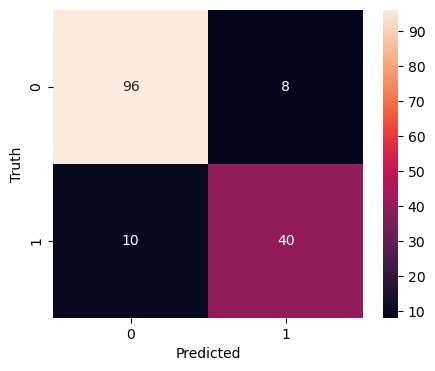

In [15]:
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       104
           1       0.83      0.80      0.82        50

    accuracy                           0.88       154
   macro avg       0.87      0.86      0.87       154
weighted avg       0.88      0.88      0.88       154

